# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak memiliki label atau kelas.
   - **Jumlah Baris**: 6607 barus
   - **Tipe Data**:
     - *Kategorikal* : Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Motivation_Level, Internet_Access, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender
     - *Numerikal* : Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, Exam_Score

3. **Deskripsi Dataset**:  
   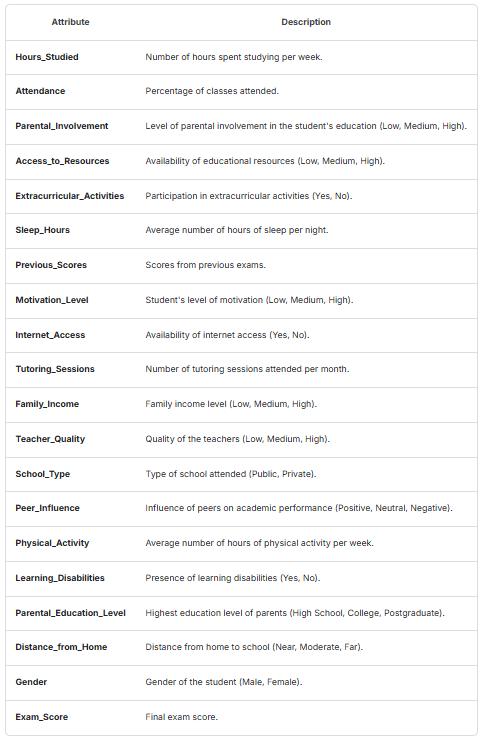

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import Library yang Diperlukan
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor


# **3. Memuat Dataset**

Pada tahap ini, saya memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

In [2]:
data = pd.read_csv("Dataset_inisiasi.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, saya melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

####1. Memahami Struktur Data

In [3]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

####2. Menangani Data yang Hilang

In [5]:
# mengecek apakah ada data kosong
data.isnull().sum() # menghitung jumlah nilai null (NaN)

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


####3. Menangani Data yang Kosong (Missing Value)

In [6]:
# mengecek apakah ada data duplikat
data.duplicated().sum() # menghitung jumlah data duplikasi

np.int64(0)

####4. Analisis Distribusi dan Korelasi

In [7]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [8]:
# Menentukan jumlah kolom numerik
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
num_plots = len(numerical_cols)

In [9]:
# Menghitung jumlah baris & kolom untuk subplot agar rapi
rows = math.ceil(num_plots / 2)  # 2 kolom per baris
cols = 2

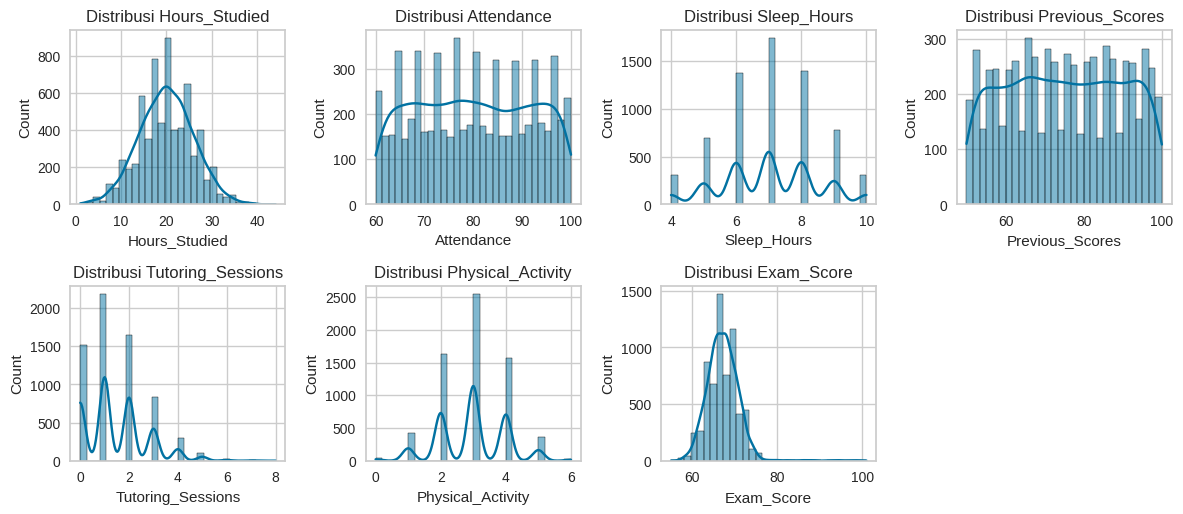

In [10]:
# Visualisasi Histogram
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, 4, i+1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

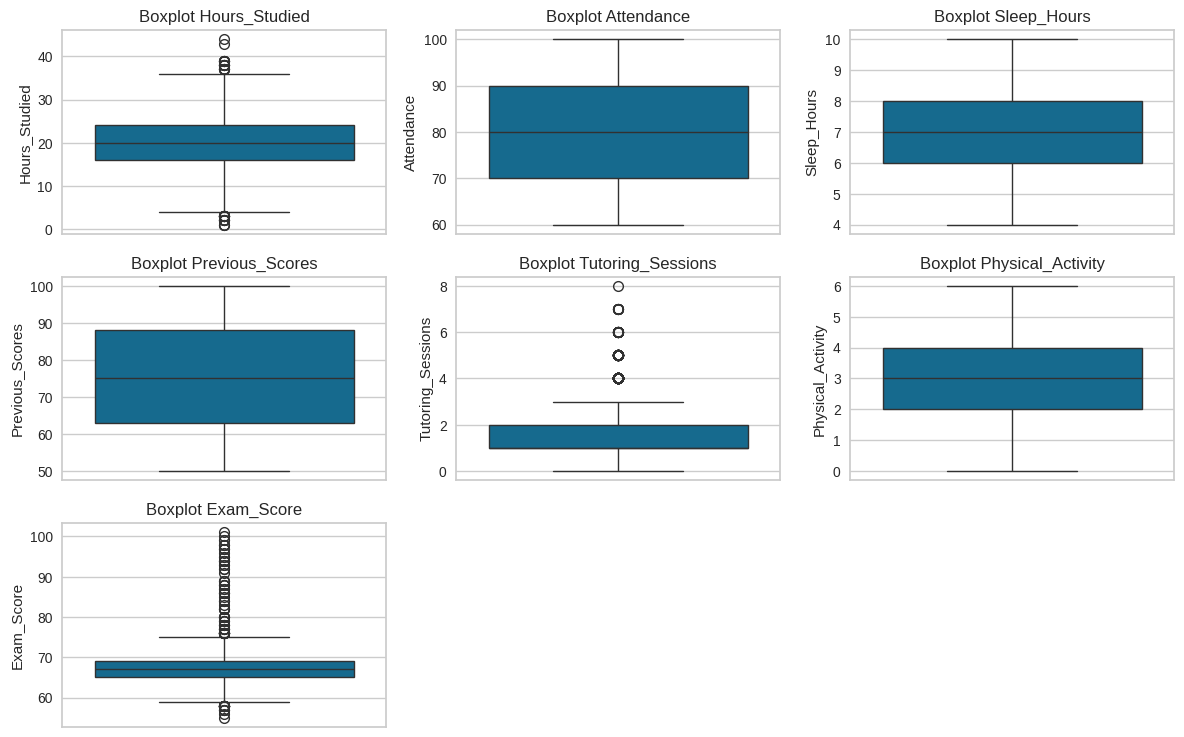

In [11]:
plt.figure(figsize=(12, 10))  # Ukuran fleksibel sesuai jumlah baris

# Loop untuk membuat subplot per kolom numerik
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot {col}')
    plt.xlabel("")  # Hapus label x agar lebih rapi

plt.tight_layout()
plt.show()

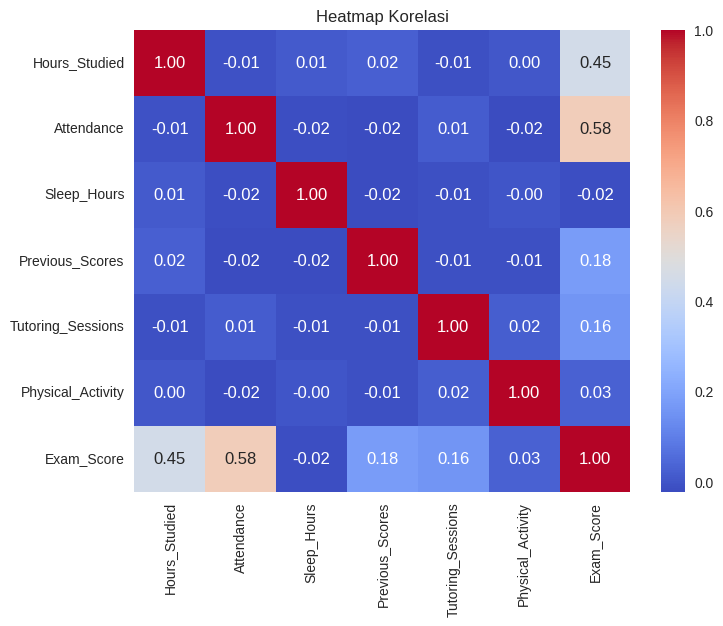

In [12]:
# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

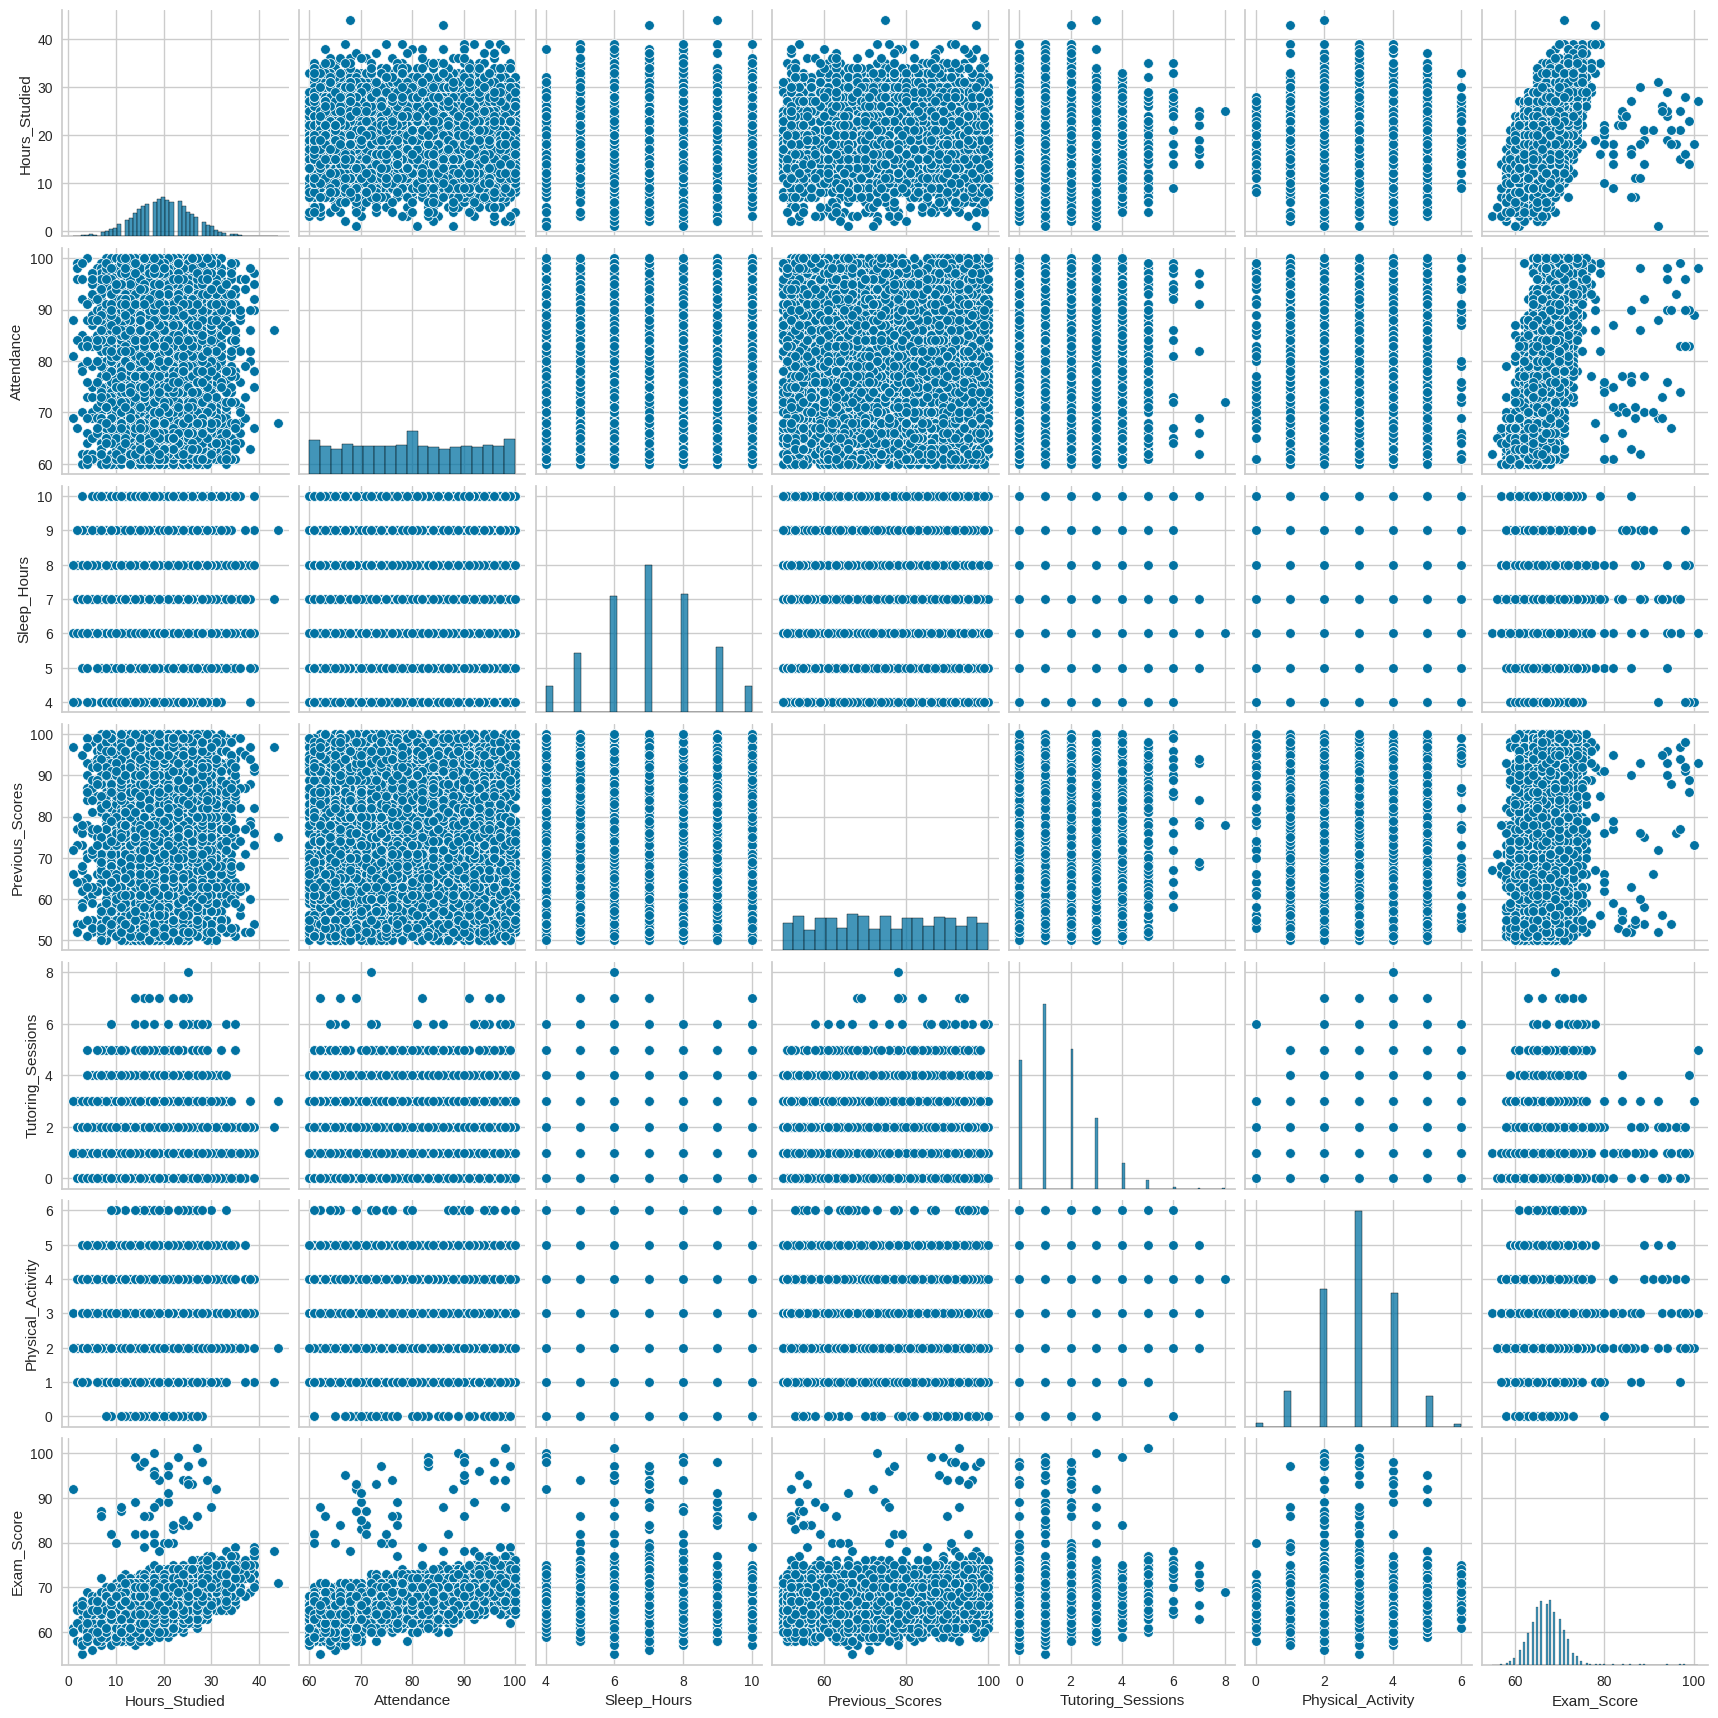

In [13]:
# Scatter plot hubungan antar variabel
sns.pairplot(data[numerical_cols])
plt.show()

####5. Visualisasi Data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

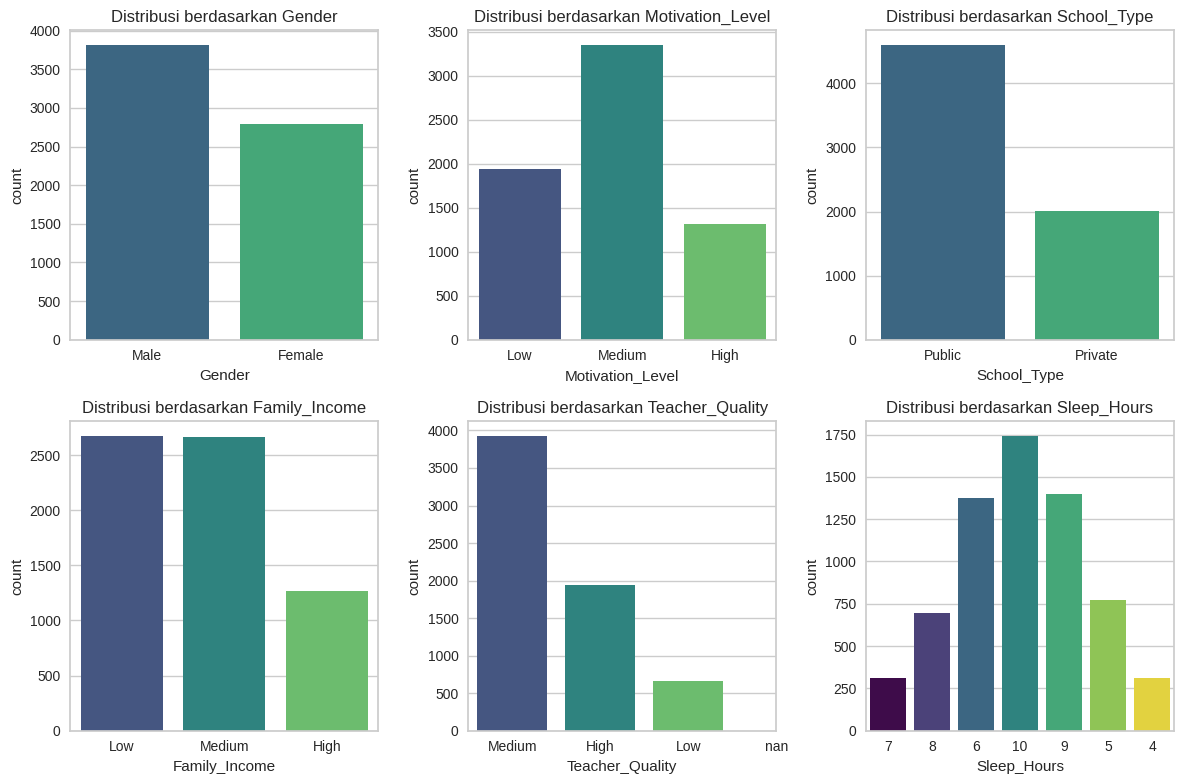

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sns.countplot(data=data, x='Gender', hue='Gender', palette='viridis', legend=False, ax=axes[0, 0])
axes[0, 0].set_title("Distribusi berdasarkan Gender")
axes[0, 0].set_xticks(range(len(data['Gender'].unique())))
axes[0, 0].set_xticklabels(data['Gender'].unique(), rotation=0)

sns.countplot(data=data, x='Motivation_Level', hue='Motivation_Level', palette='viridis', legend=False, ax=axes[0, 1])
axes[0, 1].set_title("Distribusi berdasarkan Motivation_Level")
axes[0, 1].set_xticks(range(len(data['Motivation_Level'].unique())))
axes[0, 1].set_xticklabels(data['Motivation_Level'].unique(), rotation=0)

sns.countplot(data=data, x='School_Type', hue='School_Type', palette='viridis', legend=False, ax=axes[0, 2])
axes[0, 2].set_title("Distribusi berdasarkan School_Type")
axes[0, 2].set_xticks(range(len(data['School_Type'].unique())))
axes[0, 2].set_xticklabels(data['School_Type'].unique(), rotation=0)

sns.countplot(data=data, x='Family_Income', hue='Family_Income', palette='viridis', legend=False, ax=axes[1, 0])
axes[1, 0].set_title("Distribusi berdasarkan Family_Income")
axes[1, 0].set_xticks(range(len(data['Family_Income'].unique())))
axes[1, 0].set_xticklabels(data['Family_Income'].unique(), rotation=0)

sns.countplot(data=data, x='Teacher_Quality', hue='Teacher_Quality', palette='viridis', legend=False, ax=axes[1, 1])
axes[1, 1].set_title("Distribusi berdasarkan Teacher_Quality")
axes[1, 1].set_xticks(range(len(data['Teacher_Quality'].unique())))
axes[1, 1].set_xticklabels(data['Teacher_Quality'].unique(), rotation=0)

sns.countplot(data=data, x='Sleep_Hours', hue='Sleep_Hours', palette='viridis', legend=False, ax=axes[1, 2])
axes[1, 2].set_title("Distribusi berdasarkan Sleep_Hours")
axes[1, 2].set_xticks(range(len(data['Sleep_Hours'].unique())))
axes[1, 2].set_xticklabels(data['Sleep_Hours'].unique(), rotation=0)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

####1. Menangani Data Kosong (Missing Value)

In [16]:
# mengecek kembali apakah ada data kosong
data.isnull().sum() # menghitung jumlah nilai null (NaN)

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [17]:
# Mengisi missing values dengan modus (most frequent value)
categorical_cols = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
for col in categorical_cols:
    data.fillna({col: data[col].mode()[0] for col in categorical_cols}, inplace=True)

In [18]:
data.isnull().sum() # menghitung jumlah nilai null (NaN)

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


####2. Menghapus Data Duplikat

In [19]:
# mengecek kembali apakah ada data duplikat
data.duplicated().sum() # menghitung jumlah data duplikasi

np.int64(0)

####3. Menangani Outlier

In [20]:
# Detect outliers using the Z-score method (threshold: 3 standard deviations)
z_outlier_rows = []
for col in numerical_cols:
    z_scores = np.abs(stats.zscore(data[col]))
    z_outlier_rows.extend(data.index[z_scores > 3].tolist())

# Get unique outlier rows for Z-score method
z_outlier_rows = list(set(z_outlier_rows))

# Display only the outlier rows detected by Z-score
z_outlier_df = data.loc[z_outlier_rows]

# Display the detected outliers for both methods
display("Detected Outliers (Z-score Method)", z_outlier_df)

'Detected Outliers (Z-score Method)'

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
5125,16,82,Medium,Medium,No,7,56,Low,Yes,0,High,High,Private,Negative,1,Yes,High School,Far,Female,79
1548,25,95,Low,Medium,No,7,78,Medium,Yes,7,Low,Medium,Public,Positive,4,No,High School,Near,Male,73
529,15,83,Medium,Medium,No,7,97,Medium,Yes,2,Low,High,Private,Neutral,2,No,High School,Near,Female,97
2076,24,77,High,Medium,Yes,7,57,Medium,Yes,3,Medium,High,Public,Positive,2,No,College,Far,Male,84
3617,18,95,Medium,High,Yes,6,94,Medium,Yes,6,Low,High,Public,Neutral,3,No,High School,Far,Female,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,25,73,Medium,Medium,Yes,7,56,Medium,Yes,2,High,Medium,Public,Neutral,4,No,High School,Near,Female,93
2024,2,98,Low,High,Yes,7,80,High,Yes,2,Low,High,Public,Neutral,1,No,High School,Near,Male,66
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101
2040,16,66,Low,Medium,No,6,93,Medium,Yes,7,Low,Medium,Public,Negative,2,No,High School,Far,Male,63


####4. Normalisasi Fitur

In [21]:
# Pilih fitur numerik untuk normalisasi/standarisasi
num_features = data.select_dtypes(include=['number']).columns.tolist()

In [22]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada fitur numerik dan menyimpan hasil dengan prefix "_norm"
for col in numerical_cols:
    if col in data.columns:  # Pastikan kolom ada dalam dataset
        data[col + "_minmax"] = scaler.fit_transform(data[[col]])

In [23]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Distance_from_Home,Gender,Exam_Score,Hours_Studied_minmax,Attendance_minmax,Sleep_Hours_minmax,Previous_Scores_minmax,Tutoring_Sessions_minmax,Physical_Activity_minmax,Exam_Score_minmax
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Near,Male,67,0.511628,0.600,0.500000,0.46,0.000,0.500000,0.260870
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Moderate,Female,61,0.418605,0.100,0.666667,0.18,0.250,0.666667,0.130435
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Near,Male,74,0.534884,0.950,0.500000,0.82,0.250,0.666667,0.413043
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Moderate,Male,71,0.651163,0.725,0.666667,0.96,0.125,0.666667,0.347826
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,Near,Female,70,0.418605,0.800,0.333333,0.30,0.375,0.666667,0.326087


####5. Encoding Data Kategorikal

In [24]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}\n")

Parental_Involvement: ['Low' 'Medium' 'High']

Access_to_Resources: ['High' 'Medium' 'Low']

Extracurricular_Activities: ['No' 'Yes']

Motivation_Level: ['Low' 'Medium' 'High']

Internet_Access: ['Yes' 'No']

Family_Income: ['Low' 'Medium' 'High']

Teacher_Quality: ['Medium' 'High' 'Low']

School_Type: ['Public' 'Private']

Peer_Influence: ['Positive' 'Negative' 'Neutral']

Learning_Disabilities: ['No' 'Yes']

Parental_Education_Level: ['High School' 'College' 'Postgraduate']

Distance_from_Home: ['Near' 'Moderate' 'Far']

Gender: ['Male' 'Female']



In [25]:
# Dictionary untuk menyimpan Label Encoders dan Ordinal Encoders
label_encoders = {}
ordinal_encoders = {}

# Ordinal Encoding untuk kolom dengan urutan kategori yang jelas
ordinal_features = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Distance_from_Home': ['Near', 'Moderate', 'Far']
}

# Pastikan kolom berbentuk string sebelum encoding
for col, categories in ordinal_features.items():
    if col in data.columns:  # Pastikan kolom ada dalam dataset
        ordinal_enc = OrdinalEncoder(categories=[categories])
        data[col + "_encoded"] = ordinal_enc.fit_transform(data[[col]]).astype(int)  # Konversi ke integer
        ordinal_encoders[col] = dict(zip(categories, range(len(categories))))  # Simpan mapping

# Label Encoding untuk kolom kategori nominal (bukan ordinal)
label_features = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities',
                  'Gender', 'School_Type', 'Peer_Influence']

# Loop untuk melakukan Label Encoding pada fitur nominal
for col in label_features:
    if col in data.columns:
        le = LabelEncoder()
        data[col + "_encoded"] = le.fit_transform(data[col])
        label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Simpan mapping

In [26]:
# Menampilkan mapping hasil encoding
print("Ordinal Encoders Mapping:", ordinal_encoders)
print("Label Encoders Mapping:", label_encoders)

Ordinal Encoders Mapping: {'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2}, 'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2}, 'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2}, 'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2}, 'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2}, 'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2}, 'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2}}
Label Encoders Mapping: {'Extracurricular_Activities': {'No': np.int64(0), 'Yes': np.int64(1)}, 'Internet_Access': {'No': np.int64(0), 'Yes': np.int64(1)}, 'Learning_Disabilities': {'No': np.int64(0), 'Yes': np.int64(1)}, 'Gender': {'Female': np.int64(0), 'Male': np.int64(1)}, 'School_Type': {'Private': np.int64(0), 'Public': np.int64(1)}, 'Peer_Influence': {'Negative': np.int64(0), 'Neutral': np.int64(1), 'Positive': np.int64(2)}}


In [27]:
# Gabungkan hasil encoding ke dalam satu dictionary
data_encoded = {**label_encoders, **ordinal_encoders}

In [28]:
data_encoded

{'Extracurricular_Activities': {'No': np.int64(0), 'Yes': np.int64(1)},
 'Internet_Access': {'No': np.int64(0), 'Yes': np.int64(1)},
 'Learning_Disabilities': {'No': np.int64(0), 'Yes': np.int64(1)},
 'Gender': {'Female': np.int64(0), 'Male': np.int64(1)},
 'School_Type': {'Private': np.int64(0), 'Public': np.int64(1)},
 'Peer_Influence': {'Negative': np.int64(0),
  'Neutral': np.int64(1),
  'Positive': np.int64(2)},
 'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
 'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
 'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
 'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
 'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
 'Parental_Education_Level': {'High School': 0,
  'College': 1,
  'Postgraduate': 2},
 'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2}}

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [29]:
# Menentukan fitur yang digunakan untuk clust
data_features = data.columns[20:-1].tolist()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hours_Studied                       6607 non-null   int64  
 1   Attendance                          6607 non-null   int64  
 2   Parental_Involvement                6607 non-null   object 
 3   Access_to_Resources                 6607 non-null   object 
 4   Extracurricular_Activities          6607 non-null   object 
 5   Sleep_Hours                         6607 non-null   int64  
 6   Previous_Scores                     6607 non-null   int64  
 7   Motivation_Level                    6607 non-null   object 
 8   Internet_Access                     6607 non-null   object 
 9   Tutoring_Sessions                   6607 non-null   int64  
 10  Family_Income                       6607 non-null   object 
 11  Teacher_Quality                     6607 no

In [31]:
data_cluster = data[data_features].copy()

In [32]:
# Menghapus kolom yang ada di df_cluster dari df utama
data = data.drop(columns=data_features, errors='ignore')

In [33]:
data_cluster.head()

,Hours_Studied_minmax,Attendance_minmax,Sleep_Hours_minmax,Previous_Scores_minmax,Tutoring_Sessions_minmax,Physical_Activity_minmax,Exam_Score_minmax,Parental_Involvement_encoded,Access_to_Resources_encoded,Motivation_Level_encoded,Family_Income_encoded,Teacher_Quality_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded,Extracurricular_Activities_encoded,Internet_Access_encoded,Learning_Disabilities_encoded,Gender_encoded,School_Type_encoded
0,0.511628,0.600,0.500000,0.46,0.000,0.500000,0.260870,0,2,0,0,1,0,0,0,1,0,1,1
1,0.418605,0.100,0.666667,0.18,0.250,0.666667,0.130435,0,1,0,1,1,1,1,0,1,0,0,1
2,0.534884,0.950,0.500000,0.82,0.250,0.666667,0.413043,1,1,1,1,1,2,0,1,1,0,1,1
3,0.651163,0.725,0.666667,0.96,0.125,0.666667,0.347826,0,1,1,1,1,0,1,1,1,0,1,1
4,0.418605,0.800,0.333333,0.30,0.375,0.666667,0.326087,1,1,1,1,2,1,0,1,1,0,0,1


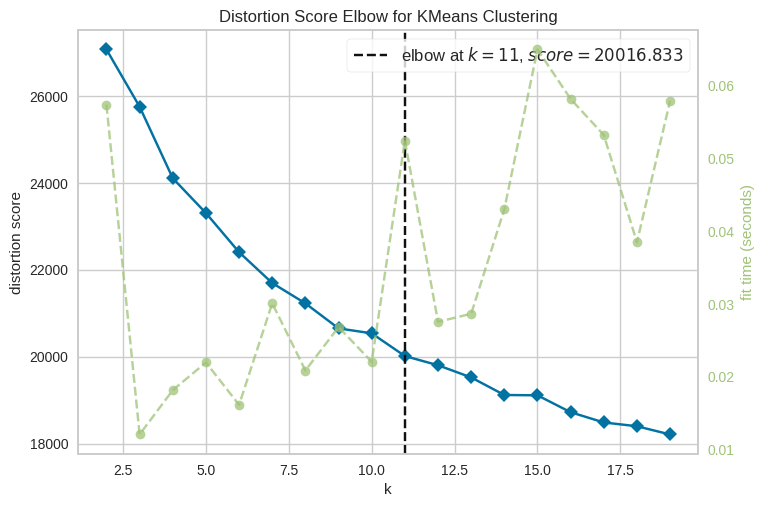

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Menentukan jumlah cluster optimal dengan Elbow Method
visualizer = KElbowVisualizer(kmeans, k=(2, 20), metric='distortion', timings=True, distance_metric='euclidean')
visualizer.fit(data_cluster)  # Fit visualizer dengan data
visualizer.show()  # Menampilkan grafik elbow

In [35]:
# Inisialisasi dan pelatihan K-Means dengan data hasil PCA
km_default = KMeans(
    random_state=70, n_clusters=7, init='k-means++', n_init=10, max_iter=300, tol=0.001
)
km_default.fit(data_cluster)
model_kmeans_labels = km_default.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [36]:
# Evaluasi dengan Silhouette Score dan Davies-Bouldin Score
silhouette_avg = silhouette_score(data_cluster, model_kmeans_labels)
davies_bouldin_avg = davies_bouldin_score(data_cluster, model_kmeans_labels)

# Menampilkan hasil evaluasi
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.4f}")

Silhouette Score: 0.0756
Davies-Bouldin Score: 2.2850


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [37]:
# Inisialisasi PCA untuk mereduksi dimensi, memilih jumlah komponen yang menjelaskan variansi
pca = PCA(n_components=2)

# Melakukan PCA pada data cluster
df_pca = pca.fit_transform(data_cluster)

# Menampilkan jumlah komponen utama yang dipilih
num_components = df_pca.shape[1]

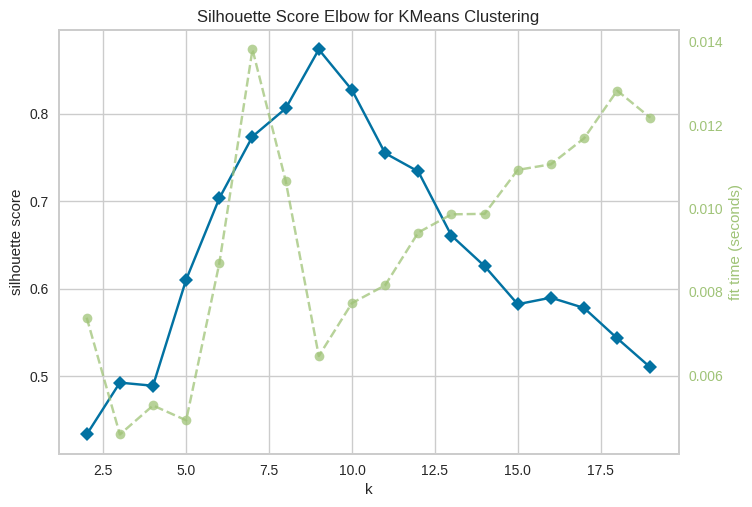

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [38]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans_pca = KMeans()

# Menentukan jumlah cluster optimal dengan Elbow Method
visualizer = KElbowVisualizer(kmeans_pca, k=(2, 20), metric='silhouette', timings=True, locate_elbow=False)
visualizer.fit(df_pca)
visualizer.show()

In [39]:
# Inisialisasi dan pelatihan K-Means dengan data hasil PCA
km_optimized = KMeans(
    random_state=77, n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.001
)
km_optimized.fit(df_pca)
model_kmeans_labels = km_optimized.labels_

In [40]:
# Evaluasi dengan Silhouette Score dan Davies-Bouldin Score
silhouette_avg = silhouette_score(df_pca, model_kmeans_labels)
davies_bouldin_avg = davies_bouldin_score(df_pca, model_kmeans_labels)

# Menampilkan hasil evaluasi
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.4f}")

Silhouette Score: 0.8328
Davies-Bouldin Score: 0.3884


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

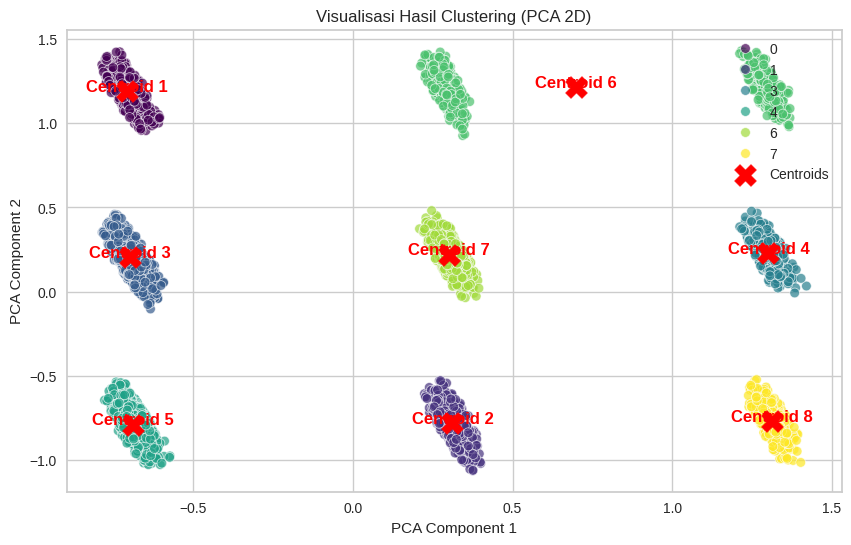

In [41]:
# Membuat figure untuk scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot dengan warna berdasarkan cluster
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=model_kmeans_labels, palette='viridis', alpha=0.7)

# Menambahkan centroid cluster
centroids = km_optimized.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, c='red', marker='X', label="Centroids")

# Menambahkan label untuk setiap centroid
for i, (x, y) in enumerate(centroids):
    plt.text(x, y, f'Centroid {i+1}', fontsize=12, weight='bold', color='red', ha='center')

# Menampilkan plot
plt.title("Visualisasi Hasil Clustering (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [42]:
data['Cluster'] = model_kmeans_labels
data_cluster['Cluster'] = model_kmeans_labels

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [43]:
data_cluster.head()

,Hours_Studied_minmax,Attendance_minmax,Sleep_Hours_minmax,Previous_Scores_minmax,Tutoring_Sessions_minmax,Physical_Activity_minmax,Exam_Score_minmax,Parental_Involvement_encoded,Access_to_Resources_encoded,Motivation_Level_encoded,Family_Income_encoded,Teacher_Quality_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded,Extracurricular_Activities_encoded,Internet_Access_encoded,Learning_Disabilities_encoded,Gender_encoded,School_Type_encoded,Cluster
0,0.511628,0.600,0.500000,0.46,0.000,0.500000,0.260870,0,2,0,0,1,0,0,0,1,0,1,1,4
1,0.418605,0.100,0.666667,0.18,0.250,0.666667,0.130435,0,1,0,1,1,1,1,0,1,0,0,1,6
2,0.534884,0.950,0.500000,0.82,0.250,0.666667,0.413043,1,1,1,1,1,2,0,1,1,0,1,1,3
3,0.651163,0.725,0.666667,0.96,0.125,0.666667,0.347826,0,1,1,1,1,0,1,1,1,0,1,1,2
4,0.418605,0.800,0.333333,0.30,0.375,0.666667,0.326087,1,1,1,1,2,1,0,1,1,0,0,1,6


In [44]:
data_inverse = data_cluster.copy()

In [45]:
# Inverse transform untuk MinMaxScaler (Numerical Columns)
for col in numerical_cols:
    norm_col = col + "_minmax"
    if norm_col in data_inverse.columns:
        data_inverse[col] = scaler.inverse_transform(data_inverse[[norm_col]])

In [46]:
# Inverse transform untuk LabelEncoder
for col in label_encoders:
    encoded_col = col + "_encoded"
    if encoded_col in data_inverse.columns:
        le = LabelEncoder()
        le.classes_ = np.array(list(label_encoders[col].keys()))
        data_inverse[col] = le.inverse_transform(data_inverse[encoded_col])

In [47]:
# Inverse transform untuk OrdinalEncoder
for col, mapping in ordinal_encoders.items():
    encoded_col = col + "_encoded"

    if encoded_col in data_inverse.columns:
        # Mengambil kategori dalam urutan yang benar
        categories = [list(mapping.keys())]  # Mengubah dictionary menjadi list dalam list

        # Membuat encoder dengan kategori yang sudah didefinisikan
        ordinal_enc = OrdinalEncoder(categories=categories)

        # Fit encoder dengan kategori yang benar (agar bisa inverse transform)
        ordinal_enc.fit(np.array(categories).reshape(-1, 1))

        # Inverse transform
        data_inverse[col] = ordinal_enc.inverse_transform(data_inverse[[encoded_col]]).ravel()

In [48]:
# Drop kolom yang sebelumnya dinormalisasi dan diencode
columns_to_drop = [col + "_minmax" for col in numerical_cols] + [col + "_encoded" for col in label_encoders] + [col + "_encoded" for col in ordinal_encoders]
data_inverse.drop(columns=columns_to_drop, errors='ignore', inplace=True)
data = data.drop(columns='Peer_Influence_encoded', errors='ignore')

In [49]:
columns_to_drop

['Hours_Studied_minmax',
 'Attendance_minmax',
 'Sleep_Hours_minmax',
 'Previous_Scores_minmax',
 'Tutoring_Sessions_minmax',
 'Physical_Activity_minmax',
 'Exam_Score_minmax',
 'Extracurricular_Activities_encoded',
 'Internet_Access_encoded',
 'Learning_Disabilities_encoded',
 'Gender_encoded',
 'School_Type_encoded',
 'Peer_Influence_encoded',
 'Parental_Involvement_encoded',
 'Access_to_Resources_encoded',
 'Motivation_Level_encoded',
 'Family_Income_encoded',
 'Teacher_Quality_encoded',
 'Parental_Education_Level_encoded',
 'Distance_from_Home_encoded']

In [50]:
data_inverse.head()

,Cluster,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Extracurricular_Activities,Internet_Access,Learning_Disabilities,Gender,School_Type,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Parental_Education_Level,Distance_from_Home
0,4,78.534884,82.60,78.000000,76.16,55.00,78.000000,67.0,No,Yes,No,Male,Public,Low,High,Low,Low,Medium,High School,Near
1,6,74.255814,59.60,85.666667,63.28,66.50,85.666667,61.0,No,Yes,No,Female,Public,Low,Medium,Low,Medium,Medium,College,Moderate
2,3,79.604651,98.70,78.000000,92.72,66.50,85.666667,74.0,Yes,Yes,No,Male,Public,Medium,Medium,Medium,Medium,Medium,Postgraduate,Near
3,2,84.953488,88.35,85.666667,99.16,60.75,85.666667,71.0,Yes,Yes,No,Male,Public,Low,Medium,Medium,Medium,Medium,High School,Moderate
4,6,74.255814,91.80,70.333333,68.80,72.25,85.666667,70.0,Yes,Yes,No,Female,Public,Medium,Medium,Medium,Medium,High,College,Near


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [51]:
# Memilih kolom numerik dan kategorikal
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(exclude=['number']).columns

In [52]:
# Menghitung mean untuk kolom numerik berdasarkan cluster
mean_values = data.groupby('Cluster')[numerical_cols].mean()

In [53]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Cluster
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,4
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,6
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,3
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,2
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,6


In [54]:
# Menampilkan hasil
# Styling dataframe agar lebih rapi
styled_numerical_mean = mean_values.style.background_gradient(cmap="coolwarm", axis=1).set_caption("📊 Mean Kolom Numerik Berdasarkan Cluster")

# Tampilkan
styled_numerical_mean

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Cluster
Cluster,,,,,,,,
0,19.803709,79.669243,6.935085,74.899536,1.505410,2.862442,67.445131,0.000000
1,19.751553,79.828571,7.083230,74.756522,1.522981,2.957764,66.848447,1.000000
2,20.210287,79.609682,7.046899,75.253404,1.484871,3.069592,67.037821,2.000000
3,19.973585,79.756604,7.028302,75.650943,1.562264,2.884906,67.888679,3.000000
4,20.026786,79.926339,7.022321,75.591518,1.481399,2.983631,66.497024,4.000000
5,20.008039,80.155949,7.011254,74.282958,1.504823,2.897106,68.255627,5.000000
6,19.845209,80.046683,7.009828,74.685504,1.465602,2.988943,67.457002,6.000000
7,19.971319,81.552581,7.086042,74.912046,1.449331,2.948375,67.751434,7.000000


In [55]:
# Menghitung modus untuk kolom kategorikal berdasarkan cluster
mode_values = data.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode()[0])

In [56]:
# Menampilkan hasil
styled_categorical_mode = mode_values.style.set_table_styles(
    [
        {"selector": "caption", "props": "font-size:16px; font-weight: bold; text-align: center;"},
        {"selector": "th", "props": "background-color: green; color: white; font-size:14px; text-align: center;"},
        {"selector": "td", "props": "font-size:13px; text-align: center;"},
    ]
).set_caption("📌 Modus Kolom Kategorikal Berdasarkan Cluster")

# Tampilkan
styled_categorical_mode

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
Cluster,,,,,,,,,,,,,
0,Medium,Medium,Yes,Medium,Yes,High,Medium,Public,Neutral,No,High School,Near,Male
1,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Neutral,No,College,Near,Male
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,High School,Near,Male
3,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
4,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
5,Medium,Medium,Yes,Medium,Yes,High,Medium,Public,Positive,No,College,Near,Male
6,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Positive,No,College,Near,Male
7,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,Postgraduate,Near,Male


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Hours_Studied:** 19.80 jam
- **Rata-rata Attendance:** 79.67%
- **Rata-rata Sleep_Hours:** 6.94 jam
- **Rata-rata Previous_Scores:** 74.90
- **Rata-rata Tutoring_Sessions:** 1.50 sesi
- **Rata-rata Physical_Activity:** 2.86 jam
- **Rata-rata Exam_Score:** 67.44
- **Mayoritas Parental_Involvement:** Medium
- **Mayoritas Access_to_Resources:** Medium
- **Mayoritas Extracurricular_Activities:** Yes
- **Mayoritas Motivation_Level:** Medium
- **Mayoritas Internet_Access:** Yes
- **Mayoritas Family_Income:** High
- **Mayoritas Teacher_Quality:** Medium
- **Mayoritas School_Type:** Public
- **Mayoritas Peer_Influence:** Neutral
- **Mayoritas Learning_Disabilities:** No
- **Mayoritas Parental_Education_Level:** High School
- **Mayoritas Distance_from_Home:** Near
- **Mayoritas Gender:** Male

**Analisis:** Cluster ini mencakup siswa dengan pendapatan keluarga tinggi (High), yang dapat berdampak positif pada skor ujian. Kegiatan ekstrakurikuler aktif (Yes), menunjukkan keseimbangan antara akademik dan non-akademik.

## Cluster 1:
- **Rata-rata Hours_Studied:** 19.75 jam
- **Rata-rata Attendance:** 79.83%
- **Rata-rata Sleep_Hours:** 7.08 jam
- **Rata-rata Previous_Scores:** 74.75
- **Rata-rata Tutoring_Sessions:** 1.52 sesi
- **Rata-rata Physical_Activity:** 2.95 jam
- **Rata-rata Exam_Score:** 66.84
- **Mayoritas Parental_Involvement:** Medium
- **Mayoritas Access_to_Resources:** Medium
- **Mayoritas Extracurricular_Activities:** Yes
- **Mayoritas Motivation_Level:** Medium
- **Mayoritas Internet_Access:** Yes
- **Mayoritas Family_Income:** Low
- **Mayoritas Teacher_Quality:** Medium
- **Mayoritas School_Type:** Public
- **Mayoritas Peer_Influence:** Neutral
- **Mayoritas Learning_Disabilities:** No
- **Mayoritas Parental_Education_Level:** College
- **Mayoritas Distance_from_Home:** Near
- **Mayoritas Gender:** Male

**Analisis:** Cluster ini mencakup siswa dengan pendapatan keluarga rendah (Low), tetapi masih memiliki akses ke sumber daya yang cukup. Tidur lebih lama (7.08 jam) dibandingkan cluster lainnya.

## Cluster 2:
- **Rata-rata Hours_Studied:** 20.21 jam
- **Rata-rata Attendance:** 79.61%
- **Rata-rata Sleep_Hours:** 7.05 jam
- **Rata-rata Previous_Scores:** 75.25
- **Rata-rata Tutoring_Sessions:** 1.48 sesi
- **Rata-rata Physical_Activity:** 3.07 jam
- **Rata-rata Exam_Score:** 67.03
- **Mayoritas Parental_Involvement:** Medium
- **Mayoritas Access_to_Resources:** Medium
- **Mayoritas Extracurricular_Activities:** Yes
- **Mayoritas Motivation_Level:** Medium
- **Mayoritas Internet_Access:** Yes
- **Mayoritas Family_Income:** Medium
- **Mayoritas Teacher_Quality:** Medium
- **Mayoritas School_Type:** Public
- **Mayoritas Peer_Influence:** Neutral
- **Mayoritas Learning_Disabilities:** No
- **Mayoritas Parental_Education_Level:** High School
- **Mayoritas Distance_from_Home:** Near
- **Mayoritas Gender:** Male

**Analisis:** Cluster ini mencakup siswa dengan aktivitas fisik tertinggi (3.07 jam), menunjukkan keseimbangan gaya hidup sehat. Nilai sebelumnya cukup tinggi (75.25), menunjukkan performa akademik yang stabil.

## Cluster 3:
- **Rata-rata Hours_Studied:** 19.97 jam
- **Rata-rata Attendance:** 79.75%
- **Rata-rata Sleep_Hours:** 7.02 jam
- **Rata-rata Previous_Scores:** 75.65
- **Rata-rata Tutoring_Sessions:** 1.56 sesi
- **Rata-rata Physical_Activity:** 2.88 jam
- **Rata-rata Exam_Score:** 67.88
- **Mayoritas Parental_Involvement:** Medium
- **Mayoritas Access_to_Resources:** Medium
- **Mayoritas Extracurricular_Activities:** Yes
- **Mayoritas Motivation_Level:** Medium
- **Mayoritas Internet_Access:** Yes
- **Mayoritas Family_Income:** Medium
- **Mayoritas Teacher_Quality:** Medium
- **Mayoritas School_Type:** Public
- **Mayoritas Peer_Influence:** Neutral
- **Mayoritas Learning_Disabilities:** No
- **Mayoritas Parental_Education_Level:** Postgrade
- **Mayoritas Distance_from_Home:** Near
- **Mayoritas Gender:** Male

**Analisis:** Cluster ini mencakup siswa dengan nilai akademik sebelumnya tertinggi (75.65), menunjukkan mereka memiliki dasar yang kuat dalam belajar.

## Cluster 4:
- **Rata-rata Hours_Studied:** 20.02 jam
- **Rata-rata Attendance:** 79.92%
- **Rata-rata Sleep_Hours:** 7.02 jam
- **Rata-rata Previous_Scores:** 75.59
- **Rata-rata Tutoring_Sessions:** 1.48 sesi
- **Rata-rata Physical_Activity:** 2.98 jam
- **Rata-rata Exam_Score:** 66.49
- **Mayoritas Parental_Involvement:** Medium
- **Mayoritas Access_to_Resources:** Medium
- **Mayoritas Extracurricular_Activities:** Yes
- **Mayoritas Motivation_Level:** Medium
- **Mayoritas Internet_Access:** Yes
- **Mayoritas Family_Income:** Low
- **Mayoritas Teacher_Quality:** Medium
- **Mayoritas School_Type:** Public
- **Mayoritas Peer_Influence:** Positive
- **Mayoritas Learning_Disabilities:** No
- **Mayoritas Parental_Education_Level:** High School
- **Mayoritas Distance_from_Home:** Near
- **Mayoritas Gender:** Male

**Analisis:** Cluster ini mencakup siswa dengan memiliki pengaruh teman positif, yang dapat meningkatkan motivasi belajar.

## Cluster 5:
- **Rata-rata Hours_Studied:** 20.00 jam
- **Rata-rata Attendance:** 80.16%
- **Rata-rata Sleep_Hours:** 7.01 jam
- **Rata-rata Previous_Scores:** 74.28
- **Rata-rata Tutoring_Sessions:** 1.50 sesi
- **Rata-rata Physical_Activity:** 2.89 jam
- **Rata-rata Exam_Score:** 68.25
- **Mayoritas Parental_Involvement:** Medium
- **Mayoritas Access_to_Resources:** Medium
- **Mayoritas Extracurricular_Activities:** Yes
- **Mayoritas Motivation_Level:** Medium
- **Mayoritas Internet_Access:** Yes
- **Mayoritas Family_Income:** High
- **Mayoritas Teacher_Quality:** Medium
- **Mayoritas School_Type:** Public
- **Mayoritas Peer_Influence:** Positive
- **Mayoritas Learning_Disabilities:** No
- **Mayoritas Parental_Education_Level:** College
- **Mayoritas Distance_from_Home:** Near
- **Mayoritas Gender:** Male

**Analisis:** Cluster ini mencakup siswa dengan memiliki skor ujian tertinggi (68.25), menunjukkan efektivitas metode belajar mereka.

## Cluster 6:
- **Rata-rata Hours_Studied:** 19.85 jam
- **Rata-rata Attendance:** 80.05%
- **Rata-rata Sleep_Hours:** 7.01 jam
- **Rata-rata Previous_Scores:** 74.69
- **Rata-rata Tutoring_Sessions:** 1.47 sesi
- **Rata-rata Physical_Activity:** 2.99 jam
- **Rata-rata Exam_Score:** 67.46
- **Mayoritas Parental_Involvement:** Medium
- **Mayoritas Access_to_Resources:** Medium
- **Mayoritas Extracurricular_Activities:** Yes
- **Mayoritas Motivation_Level:** Medium
- **Mayoritas Internet_Access:** Yes
- **Mayoritas Family_Income:** High
- **Mayoritas Teacher_Quality:** Medium
- **Mayoritas School_Type:** Public
- **Mayoritas Peer_Influence:** Positive
- **Mayoritas Learning_Disabilities:** No
- **Mayoritas Parental_Education_Level:** College
- **Mayoritas Distance_from_Home:** Near
- **Mayoritas Gender:** Male

**Analisis:** Cluster ini mencakup siswa dengan ,emiliki tingkat kehadiran yang cukup tinggi (80.05%), menunjukkan komitmen terhadap sekolah. Peer influence positif, yang dapat berdampak baik pada motivasi belajar.

## Cluster 7:
- **Rata-rata Hours_Studied:** 19.97 jam
- **Rata-rata Attendance:** 81.55%
- **Rata-rata Sleep_Hours:** 7.09 jam
- **Rata-rata Previous_Scores:** 74.91
- **Rata-rata Tutoring_Sessions:** 1.44 sesi
- **Rata-rata Physical_Activity:** 2.94 jam
- **Rata-rata Exam_Score:** 67.75
- **Mayoritas Parental_Involvement:** Medium
- **Mayoritas Access_to_Resources:** Medium
- **Mayoritas Extracurricular_Activities:** Yes
- **Mayoritas Motivation_Level:** Medium
- **Mayoritas Internet_Access:** Yes
- **Mayoritas Family_Income:** Low
- **Mayoritas Teacher_Quality:** Medium
- **Mayoritas School_Type:** Public
- **Mayoritas Peer_Influence:** Possitive
- **Mayoritas Learning_Disabilities:** No
- **Mayoritas Parental_Education_Level:** Postgrade
- **Mayoritas Distance_from_Home:** Near
- **Mayoritas Gender:** Male

**Analisis:** Cluster ini mencakup siswa dengan memiliki tingkat kehadiran tertinggi (81.55%), menunjukkan keterlibatan yang tinggi dalam kegiatan sekolah. Tidur paling lama (7.09 jam) dibandingkan cluster lain, yang mungkin berpengaruh pada performa akademik.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [57]:
data_cluster.to_csv("DDataset_clustering.csv", index=False)